# #1.Imorting necessary libraries and the data set

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [2]:
#loading the data sets
#The data sets from sklearn is in dict form snd changing back to pandas so as to view the datas clearly
data=datasets.load_iris()
df=pd.DataFrame(data['data'])
df['target']=data['target']


# 2.Geting to know about the datas

In [3]:
df.describe()

,0,1,2,3,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0         150 non-null float64
1         150 non-null float64
2         150 non-null float64
3         150 non-null float64
target    150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E1D4EB06C8>,
      dtype=object)

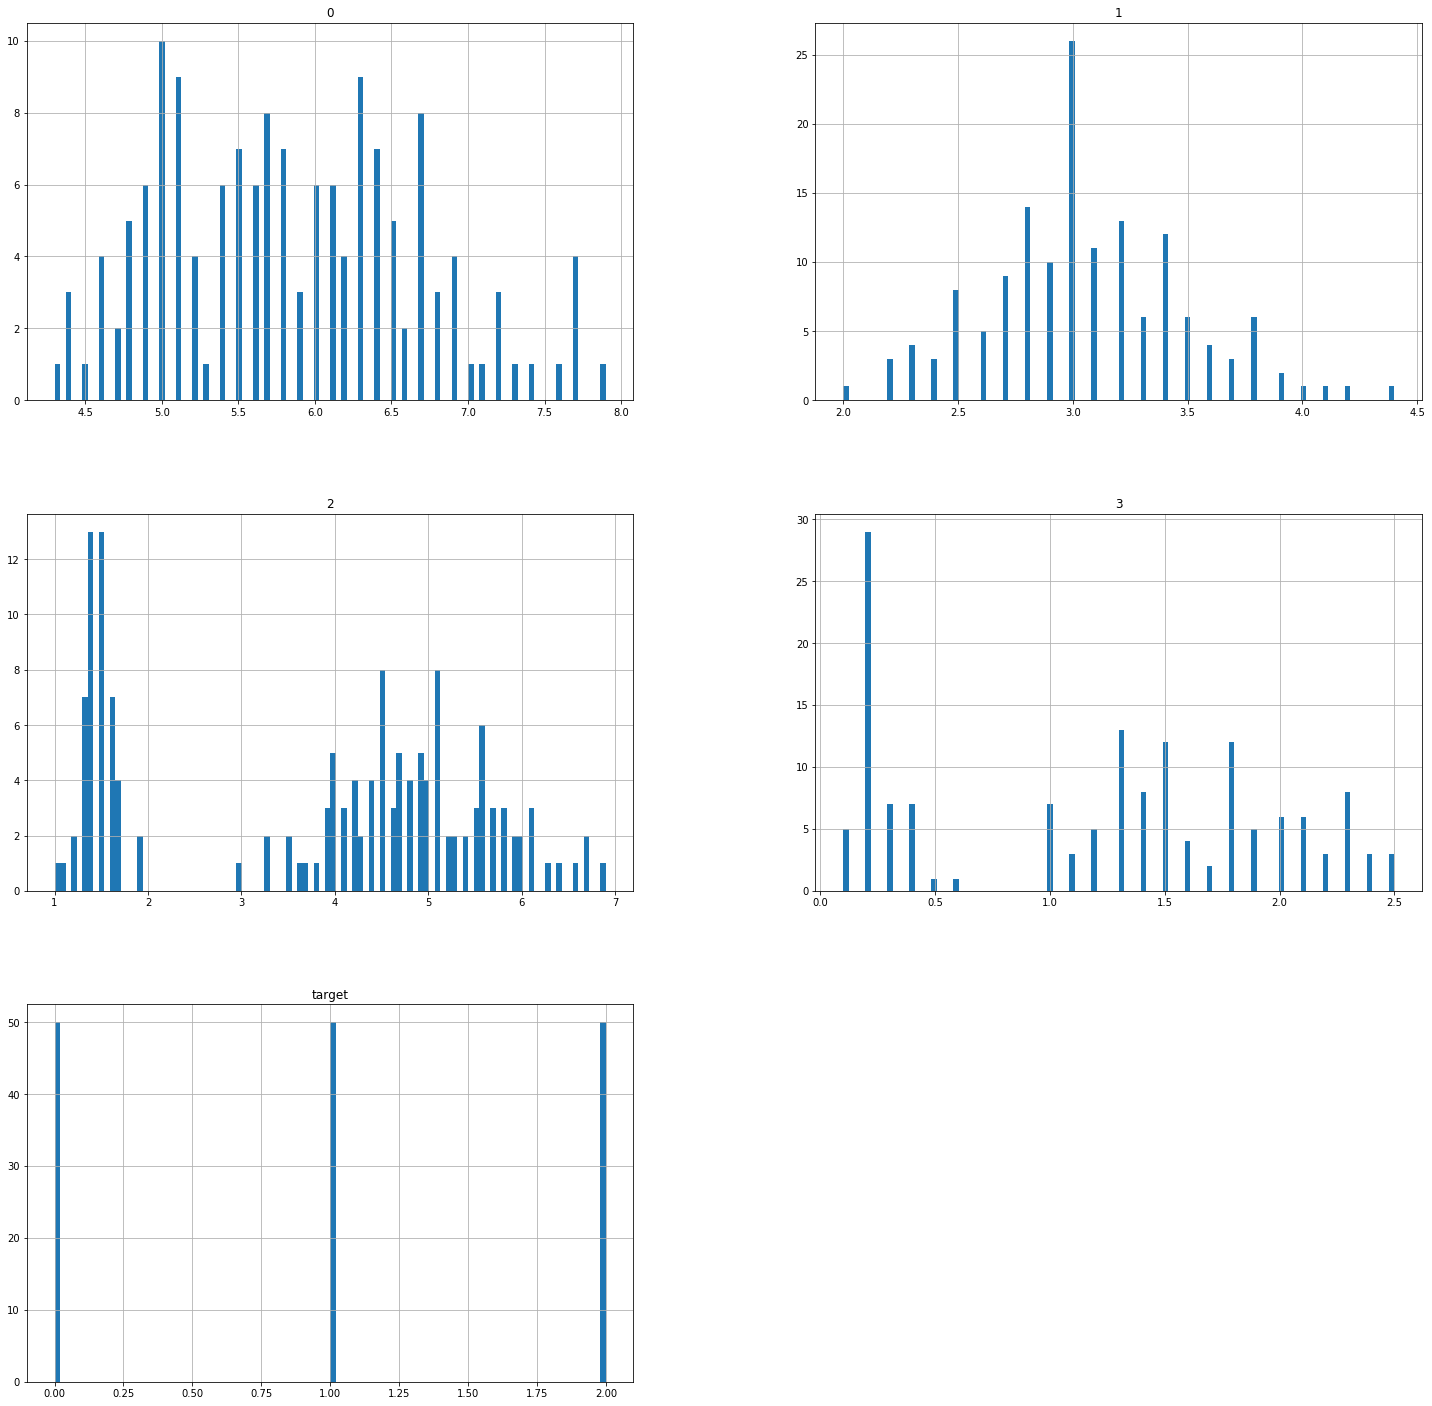

In [5]:
df.hist(bins=100,figsize=(25,25))


In [6]:
df.groupby('target').size()   # viewing how many rows are there on each class

target
0    50
1    50
2    50
dtype: int64

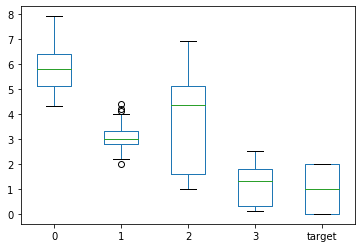

In [7]:
df.plot(kind='box')


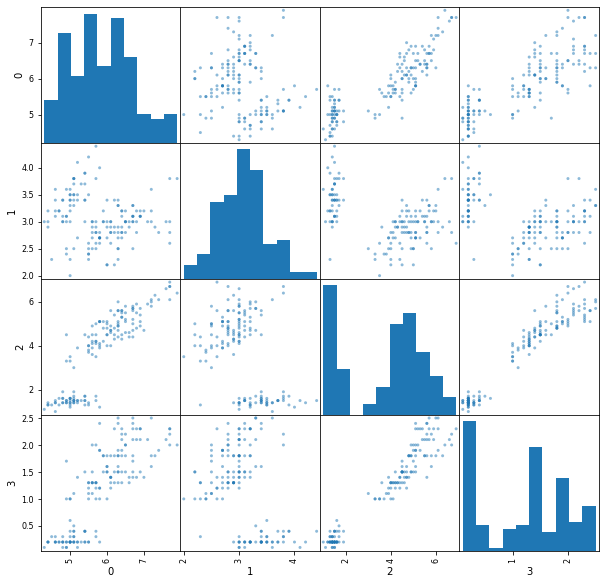

In [8]:

# scatter plot matrix,multivariate plot to show the relation between features
scatter_matrix(df.drop('target',axis=1),figsize=(10,10))
plt.show()


# 2.1 Imputing and scaling the data sets


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
mypipline=Pipeline([ ('imputer',SimpleImputer(strategy="median")),('std_scaler', StandardScaler()) ])

In [10]:


updated_data_Xonly=mypipline.fit_transform(df.drop('target',axis=1))    # the new data formed is not the pandas df,it is numpy array

#To see in visuals we have to change it back to pandas df

df1=pd.DataFrame(updated_data_Xonly)
updated_data_Xonly.shape

(150, 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E1D5B7EF08>,
      dtype=object)

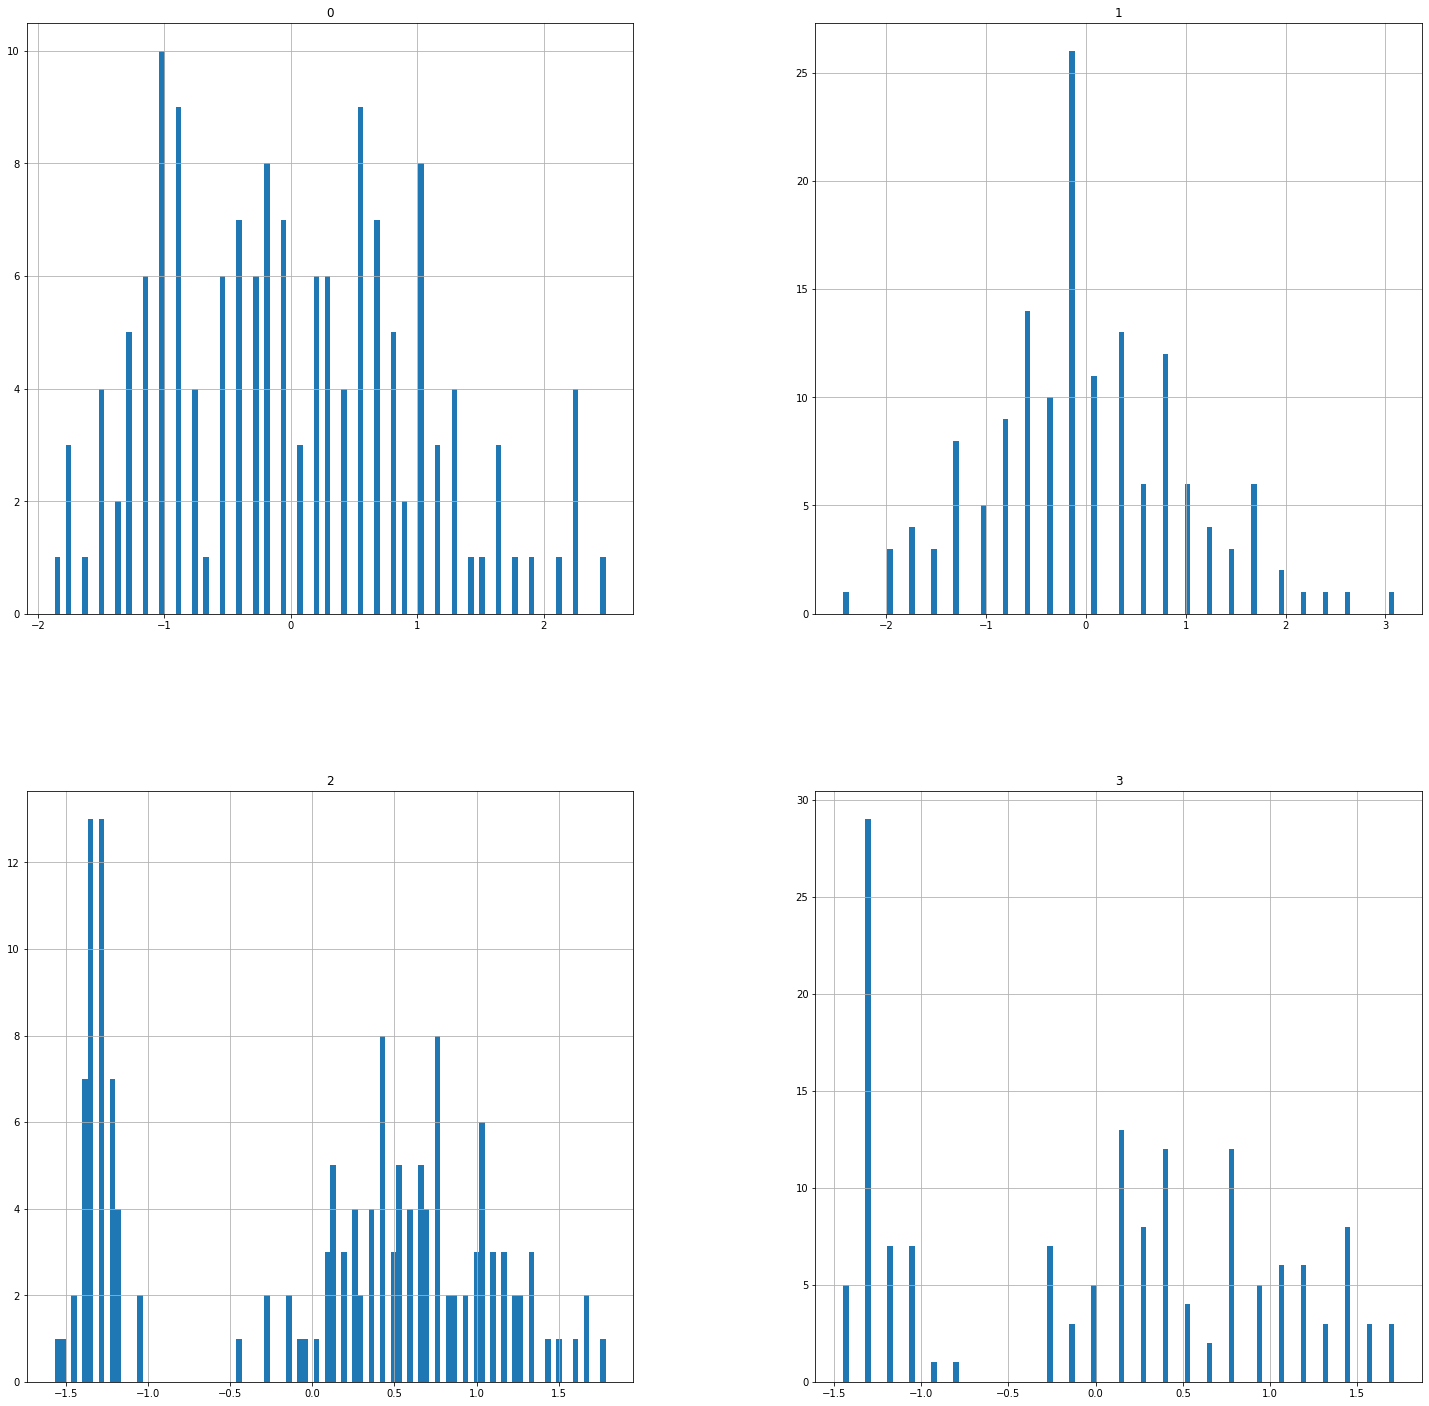

In [11]:
df1.hist(bins=100,figsize=(25,25))

# 3 Splitting training and testing sets

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df1,df['target'],test_size=0.2,random_state=42)


In [13]:
X_train.shape


(120, 4)

In [14]:
Y_train.shape

(120,)

In [15]:
X_test.shape

(30, 4)

In [16]:
Y_test.shape

(30,)

# Selecting different classification model

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# model1=KNeighborsClassifier(n_neighbors=2)
model2=SVC(C=0.5,gamma=0.1,kernel='linear')
# model3=RandomForestClassifier()

# model1.fit(X_train,Y_train)
model2.fit(X_train,Y_train)
# model3.fit(X_train,Y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# 4 Now we have to cross validate our models 

In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np

def CV_score(model):
    a=cross_val_score(model,X_train,Y_train,scoring="f1_samples",cv=15)
    
    return a
    


In [24]:

# result=np.zeros(3)

# result

# r1=CV_score(model1)
# print('Std. from KN=',r1)

r2=CV_score(model2)
print('\n Accuracy from SVC=',r2)

# r3=CV_score(model2)
# print('\n Std. from RF=',r3)


# plt.boxplot([CV_score(model1),CV_score(model2),CV_score(model3)], labels=label)
# plt.title('Algorithm Comparison')
# plt.show()




ValueError: Samplewise metrics are not available outside of multilabel classification.

In [20]:
print("the predicted values are=",model2.predict(X_test))
print("\n  actual values are= ",Y_test)

the predicted values are= [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

  actual values are=  73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: target, dtype: int32
